In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('italy.csv')

In [4]:
df

,Time,Latitude,Longitude,Depth/Km,Magnitude
0,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
1,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
3,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
4,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
...,...,...,...,...,...
8081,2016-11-30 18:39:27.600,42.8903,13.0197,10.7,2.0
8082,2016-11-30 18:43:14.850,42.9443,13.2003,8.6,2.6
8083,2016-11-30 20:18:27.550,43.0092,13.1288,8.0,2.2
8084,2016-11-30 20:45:11.780,43.0197,13.1017,9.3,2.7


In [5]:
df = df.drop_duplicates()
df

,Time,Latitude,Longitude,Depth/Km,Magnitude
0,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
1,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
3,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
4,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
...,...,...,...,...,...
8081,2016-11-30 18:39:27.600,42.8903,13.0197,10.7,2.0
8082,2016-11-30 18:43:14.850,42.9443,13.2003,8.6,2.6
8083,2016-11-30 20:18:27.550,43.0092,13.1288,8.0,2.2
8084,2016-11-30 20:45:11.780,43.0197,13.1017,9.3,2.7


In [6]:
df.dtypes

Time          object
Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [7]:
df.isnull().sum()

Time         0
Latitude     0
Longitude    0
Depth/Km     0
Magnitude    0
dtype: int64

In [8]:
df = df.rename(columns={'Latitude': 'lat', 'Longitude': 'long', 'Depth/Km': 'depth', 'Magnitude': 'mag'})
df

,Time,lat,long,depth,mag
0,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
1,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
3,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
4,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
...,...,...,...,...,...
8081,2016-11-30 18:39:27.600,42.8903,13.0197,10.7,2.0
8082,2016-11-30 18:43:14.850,42.9443,13.2003,8.6,2.6
8083,2016-11-30 20:18:27.550,43.0092,13.1288,8.0,2.2
8084,2016-11-30 20:45:11.780,43.0197,13.1017,9.3,2.7


In [9]:
# Convert 'time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract only the date portion and rename the column
df['date'] = df['Time'].dt.date

# Reorder columns to place 'date' as the first column
df = df[['date', 'lat', 'long', 'depth', 'mag', 'Time']]

# Drop the original 'time' column if you no longer need it
df = df.drop(columns=['Time'])
df

,date,lat,long,depth,mag
0,2016-08-24,42.6983,13.2335,8.1,6.0
1,2016-08-24,42.7123,13.2533,9.0,4.5
2,2016-08-24,42.7647,13.1723,9.7,3.8
3,2016-08-24,42.7803,13.1683,9.7,3.9
4,2016-08-24,42.7798,13.1575,9.7,3.6
...,...,...,...,...,...
8081,2016-11-30,42.8903,13.0197,10.7,2.0
8082,2016-11-30,42.9443,13.2003,8.6,2.6
8083,2016-11-30,43.0092,13.1288,8.0,2.2
8084,2016-11-30,43.0197,13.1017,9.3,2.7


In [10]:
df.describe()

,lat,long,depth,mag
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


In [11]:
df.corr()

C:\Users\anuar\AppData\Local\Temp\ipykernel_7672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,lat,long,depth,mag
lat,1.000000,-0.549849,-0.258848,0.009457
long,-0.549849,1.000000,0.148112,-0.017031
depth,-0.258848,0.148112,1.000000,-0.098723
mag,0.009457,-0.017031,-0.098723,1.000000


# ARIMA

In [12]:
df = df[['mag']].copy()

In [13]:
df.describe()

,mag
count,8086.000000
mean,2.398368
std,0.426381
min,2.000000
25%,2.100000
50%,2.300000
75%,2.600000
max,6.500000


In [14]:
# Check if mag series is stationary
from statsmodels.tsa.stattools import adfuller 

result = adfuller(df.mag.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -6.688144004002964
p-value: 4.1751045115926885e-09


# Autocorrelation Function (ACF)

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

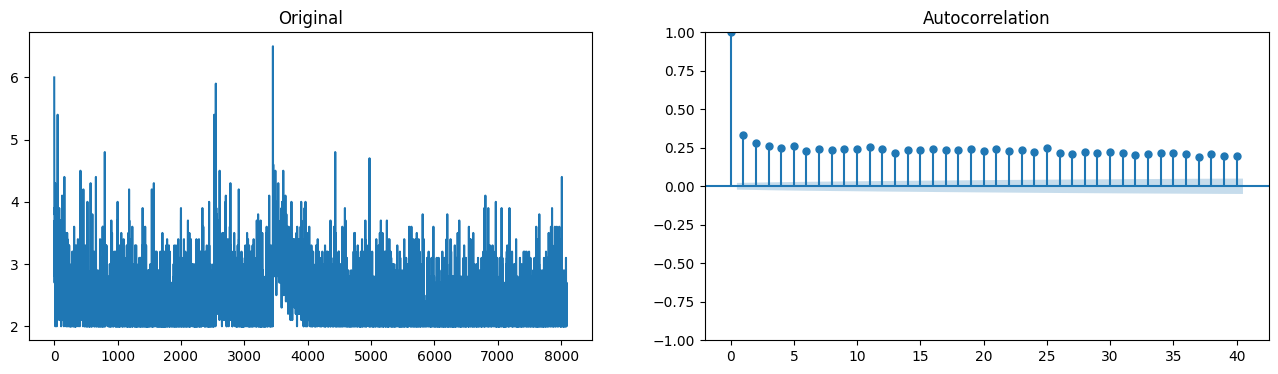

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,4))

ax1.plot(df.mag)
ax1.set_title("Original")

plot_acf(df.mag, ax=ax2);

# Partial Autocorrelation Function (PACF)

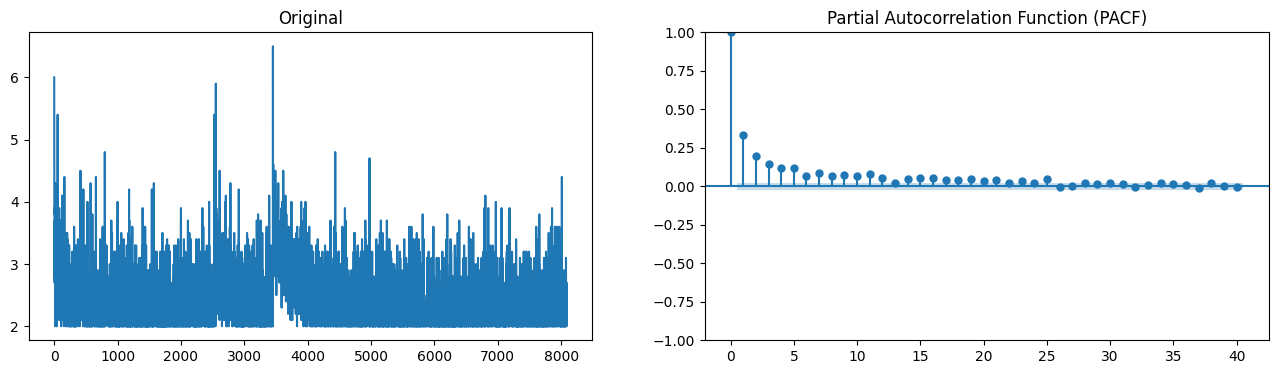

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot the original time series
ax1.plot(df.mag)
ax1.set_title("Original")

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(df.mag, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [18]:
from pmdarima.arima.utils import ndiffs 

In [19]:
ndiffs(df.mag, test="adf")

0

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# 2,0,1 ARIMA Model
model1 = ARIMA(df.mag, order=(2,0,1))
model1_fit = model1.fit()
print(model1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    mag   No. Observations:                 8086
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -3514.729
Date:                Tue, 12 Dec 2023   AIC                           7039.458
Time:                        22:30:59   BIC                           7074.448
Sample:                             0   HQIC                          7051.428
                               - 8086                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4268      0.078     31.160      0.000       2.274       2.579
ar.L1          1.0947      0.010    108.679      0.000       1.075       1.114
ar.L2         -0.0980      0.010     -9.889      0.0

In [22]:
# 2,0,2 ARIMA Model
model2 = ARIMA(df.mag, order=(2,0,2))
model2_fit = model2.fit()
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    mag   No. Observations:                 8086
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -3511.597
Date:                Tue, 12 Dec 2023   AIC                           7035.195
Time:                        23:09:37   BIC                           7077.182
Sample:                             0   HQIC                          7049.558
                               - 8086                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4353      0.110     22.155      0.000       2.220       2.651
ar.L1          1.4021      0.090     15.656      0.000       1.227       1.578
ar.L2         -0.4035      0.089     -4.520      0.0

C:\Users\anuar\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions for model1
predictions_model1 = model1_fit.predict()

# Make predictions for model2
predictions_model2 = model2_fit.predict()

# Actual values
actual_values = df.mag

# Calculate metrics for model1
mae_model1 = mean_absolute_error(actual_values, predictions_model1)
mape_model1 = np.mean(np.abs((actual_values - predictions_model1) / actual_values)) * 100
rmse_model1 = np.sqrt(mean_squared_error(actual_values, predictions_model1))

# Calculate metrics for model2
mae_model2 = mean_absolute_error(actual_values, predictions_model2)
mape_model2 = np.mean(np.abs((actual_values - predictions_model2) / actual_values)) * 100
rmse_model2 = np.sqrt(mean_squared_error(actual_values, predictions_model2))

# Print the results
print("Model 1:")
print("MAE:", mae_model1)
print("MAPE:", mape_model1)
print("RMSE:", rmse_model1)

print("\nModel 2:")
print("MAE:", mae_model2)
print("MAPE:", mape_model2)
print("RMSE:", rmse_model2)

Model 1:
MAE: 0.2748777372810272
MAPE: 11.036382526940578
RMSE: 0.37433176188307904

Model 2:
MAE: 0.27468428235550757
MAPE: 11.026391705194737
RMSE: 0.37431973512790995
